In [1]:
from scipy.integrate import odeint
import math 
import numpy as np
import matplotlib.pyplot as plt
import theano
%matplotlib inline
THEANO_FLAGS='optimizer=fast_compile'

theano.config.exception_verbosity= 'high'

/Users/alex/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/alex/anaconda3/envs/myenv/lib/python3.8/site-packages/theano/scalar/basic.py:2323: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  self.ctor = getattr(np, o_type.dtype)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [12]:
def model_deriv_GDW2(y, t, param):
    #Define parameters
    a1, a2, alpha, k1=param
    
    #define states
    X1, X2=y
    #define derivatives
    dX1_dt=a1/(1+a2*(X2**10)) -alpha*X1
    dX2_dt=k1*X1 - alpha*X2
    
    return dX1_dt,dX2_dt

def model_deriv_GDW3(y, t, param):
    #Define parameters
    a1, a2, alpha, k1, k2=param
    
    #define states
    X1, X2, X3=y
    #define derivatives
    dX1_dt=a1/(1+a2*(X3**10)) -alpha*X1
    dX2_dt=k1*X1 - alpha*X2
    dX3_dt=k2*X2 - alpha*X3
    
    
    return dX1_dt,dX2_dt,dX3_dt
def model_deriv_GDW5(y, t, param):
    #Define parameters
    a1, a2, alpha, k1, k2, k3, k4=param
    
    #define states
    X1, X2, X3, X4, X5=y
    #define derivatives
    dX1_dt=a1/(1+a2*(X5**10)) -alpha*X1
    dX2_dt=k1*X1 - alpha*X2
    dX3_dt=k2*X2 - alpha*X3
    dX4_dt=k3*X3 - alpha*X4
    dX5_dt=k4*X4 - alpha*X5
    
    return dX1_dt,dX2_dt,dX3_dt,dX4_dt,dX5_dt  

def model_sol_GDW2(param):
        
        y0 = [0,0]
        time = np.linspace(0, 50, 120)
        solution = odeint(model_deriv_GDW2, y0, time, args=(param,))
        return np.array(solution)

def model_sol_GDW3(param):
    
    y0 = [0,0,0]
    time = np.linspace(0, 50, 120)
    solution = odeint(model_deriv_GDW3, y0, time, args=(param,))
    return np.array(solution)
def model_sol_GDW5(param):
    
    y0 = [0,0,0,0,0]
    time = np.linspace(0, 50, 120)
    solution = odeint(model_deriv_GDW5, y0, time, args=(param,))
    return np.array(solution[:,0:3])

In [24]:
sigma=0.2
solGD3=model_sol_GDW3([1.97,0.15,0.53,0.46,1.49])#,1.69,1.69
solGD5=model_sol_GDW5([1.97,0.15,0.53,0.46,1.49,1.69,1.69])
Y=solGD3+np.random.randn(120,3)*sigma

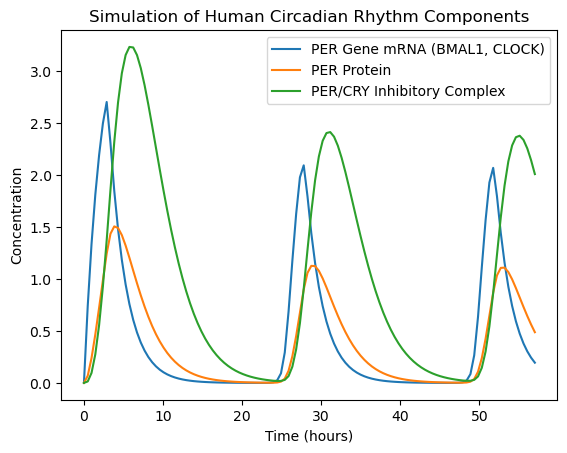

In [30]:
time = np.linspace(0, 57, 120)

plt.plot(time, solGD5[:,0], label='PER Gene mRNA (BMAL1, CLOCK)')
plt.plot(time, solGD5[:,1], label='PER Protein')
plt.plot(time, solGD5[:,2], label='PER/CRY Inhibitory Complex')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Simulation of Human Circadian Rhythm Components')
plt.legend()
plt.show()
